In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
base_path = "/home/alqio/data/data/"

data_paths = {
    "cppmatlab": "durations-cppmatlab.dat",
    "cppmatlab-release-steady-sched": "durations-cppmatlab-release-steady-sched.dat",
    "cppmatlab-release": "durations-cppmatlab-release.dat",
    "xeon": "durations-xeon-peak-cpp.data",
    #"cppmatlab-release-after-process": "durations-cppmatlab-release-after-process.dat",
    #"python-release-after-process": "durations-python-release-after-process.dat",
    "matlab": "durations-matlab.dat",
    "python": "durations-python.dat",
    "python-old": "durations-python-old.dat",
    "python-no-gc": "durations-python-no-gc.dat",
    "python-no-gc-release": "durations-python-no-gc-release.dat",
    "python-no-gc-release-steady": "durations-python-no-gc-release-steady.dat",
    "python-no-gc-release-steady-sched": "durations-python-no-gc-release-steady-sched.dat",
}

datas = {}

for key, path in data_paths.items():
    datas[key] = np.genfromtxt(base_path + path, delimiter=',')
    print(f"{key}: {datas[key].shape}")

cppmatlab: (1025143,)
cppmatlab-release-steady-sched: (1202674,)
cppmatlab-release: (1153392,)
xeon: (1020306,)
matlab: (1008767,)
python: (1161933,)
python-old: (936186,)
python-no-gc: (1023636,)
python-no-gc-release: (1049596,)
python-no-gc-release-steady: (1011293,)
python-no-gc-release-steady-sched: (1030995,)


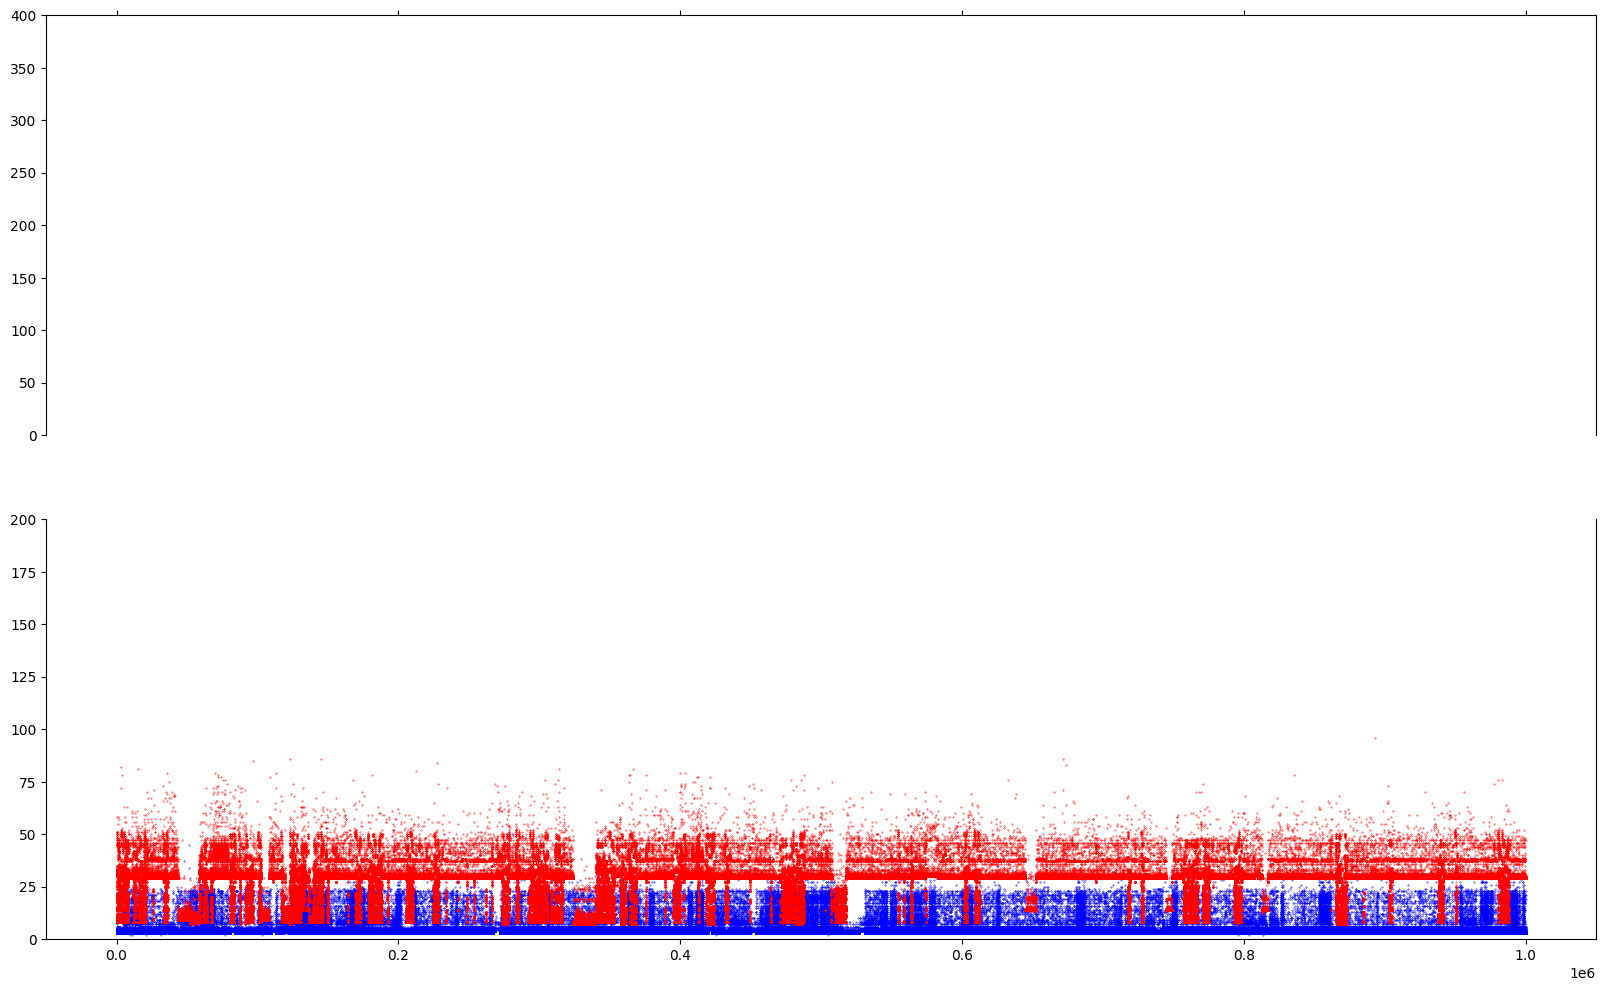

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.set_figwidth(20)
f.set_figheight(12)

start = 0
max_len = 1000000
x = range(start, max_len)

#ax1.scatter(x, datas["matlab"][:max_len], s=0.1, c='red')
#ax2.scatter(x, datas["cppmatlab-release-after-process"][start:max_len], s=0.1, c='blue')
#ax2.scatter(x, datas["cppmatlab-release-steady-sched"][:max_len], s=0.1, c='red')
ax2.scatter(x, datas["cppmatlab-release"][start:max_len], s=0.1, c='blue')
ax2.scatter(x, datas["xeon"][start:max_len], s=0.1, c='red')
#ax2.scatter(x, datas["python-old"][:max_len], s=0.1, c='#2a87a1')

ax1.set_ylim(0, 400)  # outliers only
ax2.set_ylim(0, 200)  # most of the data

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

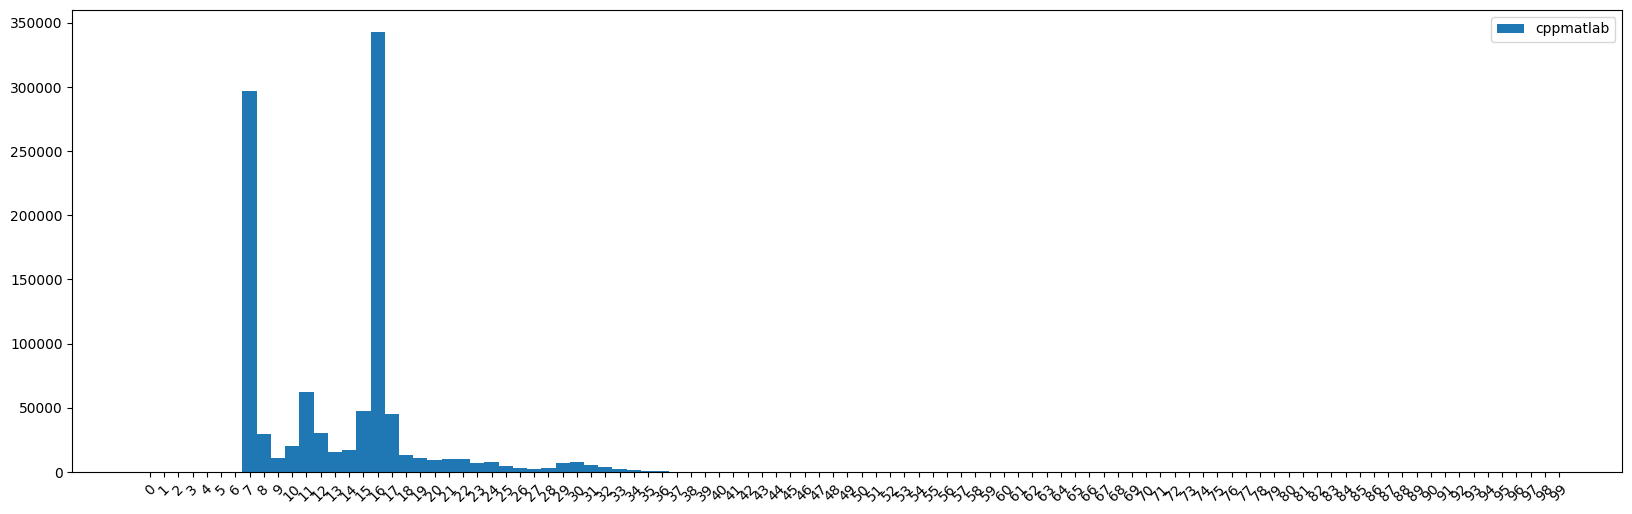

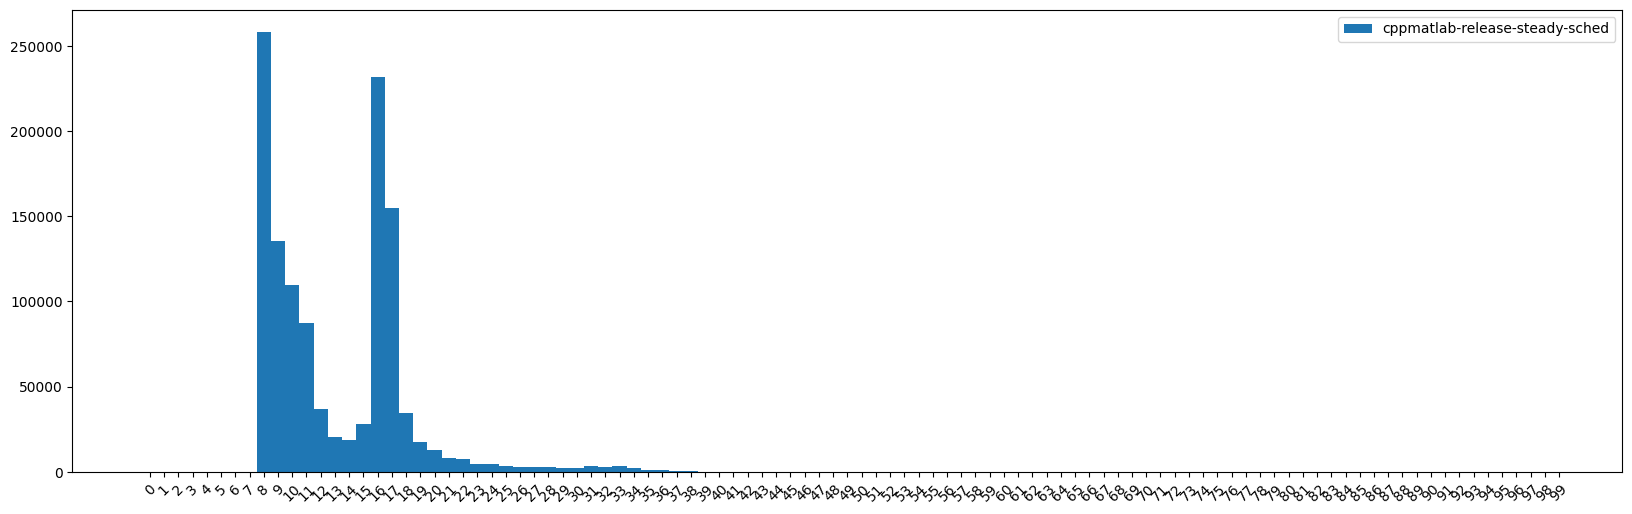

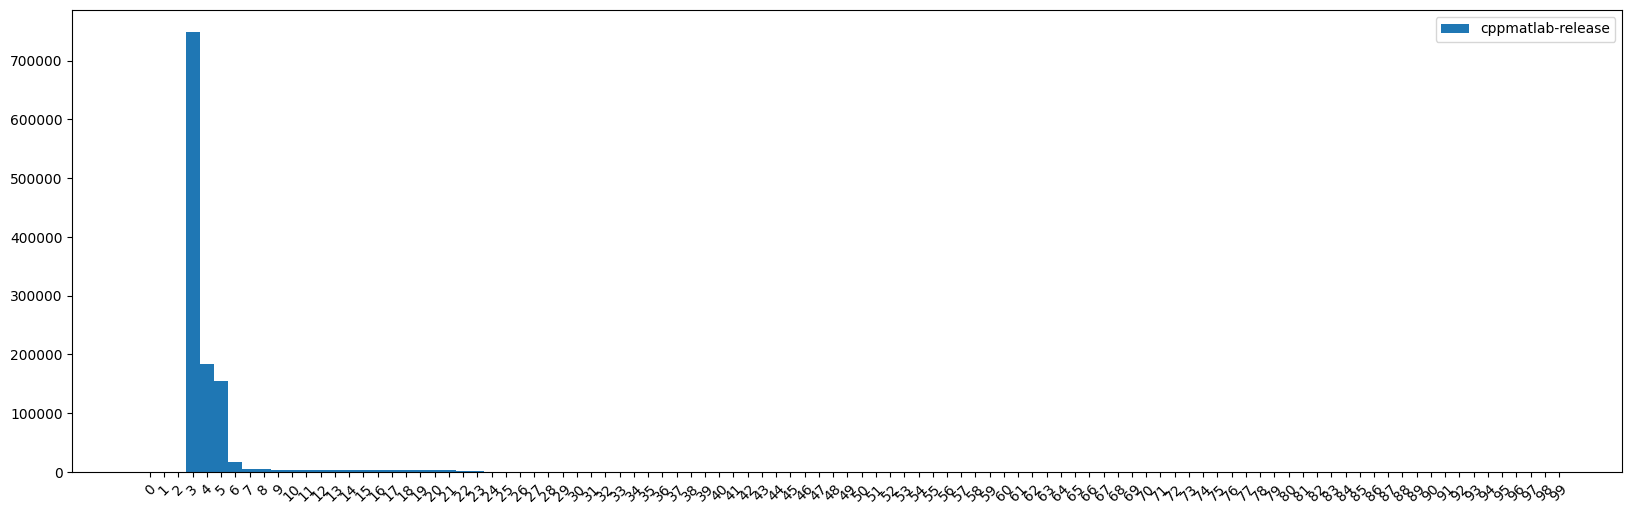

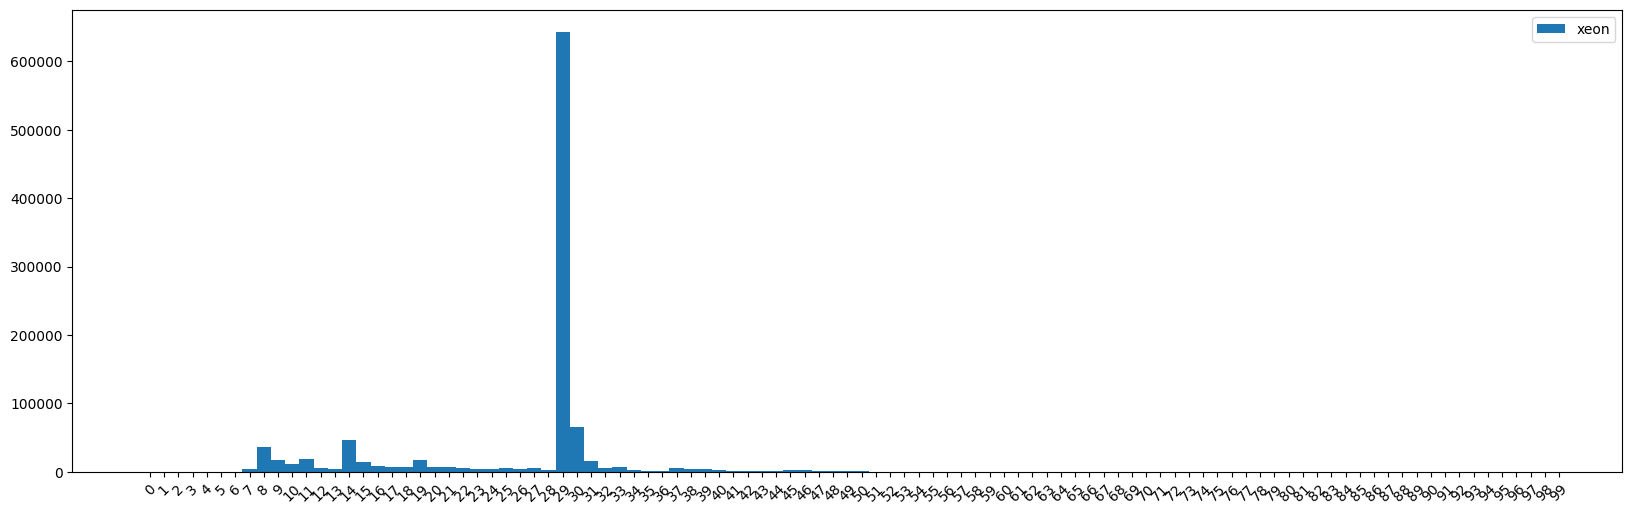

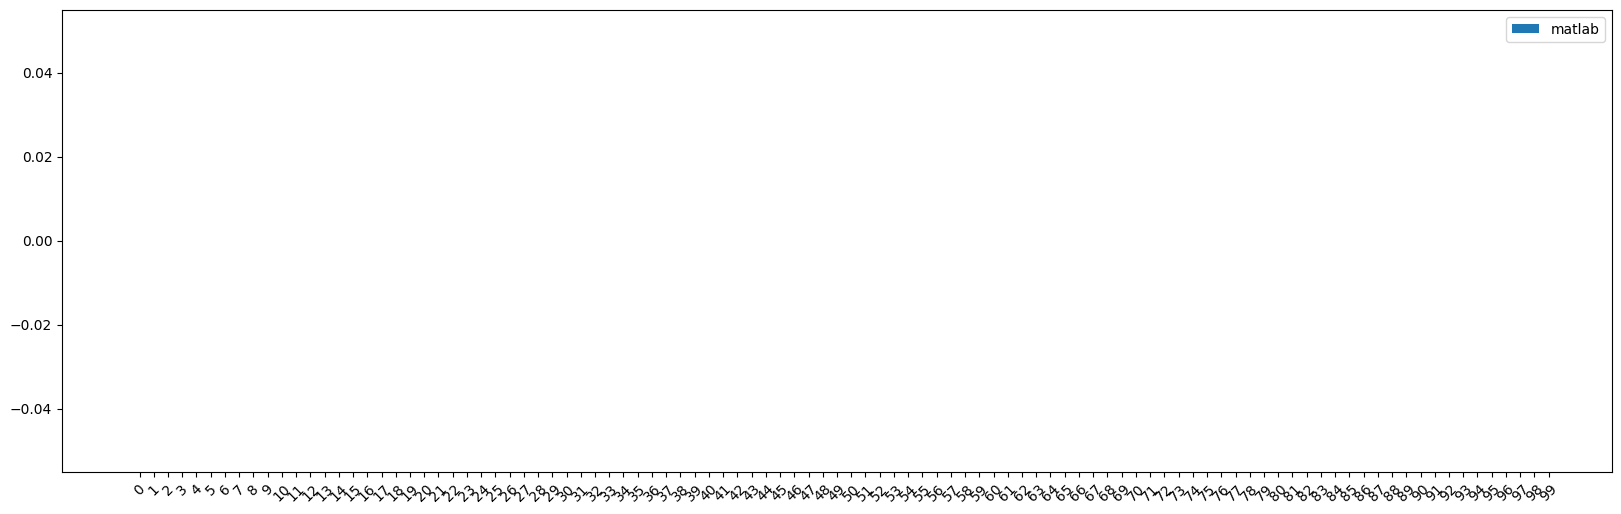

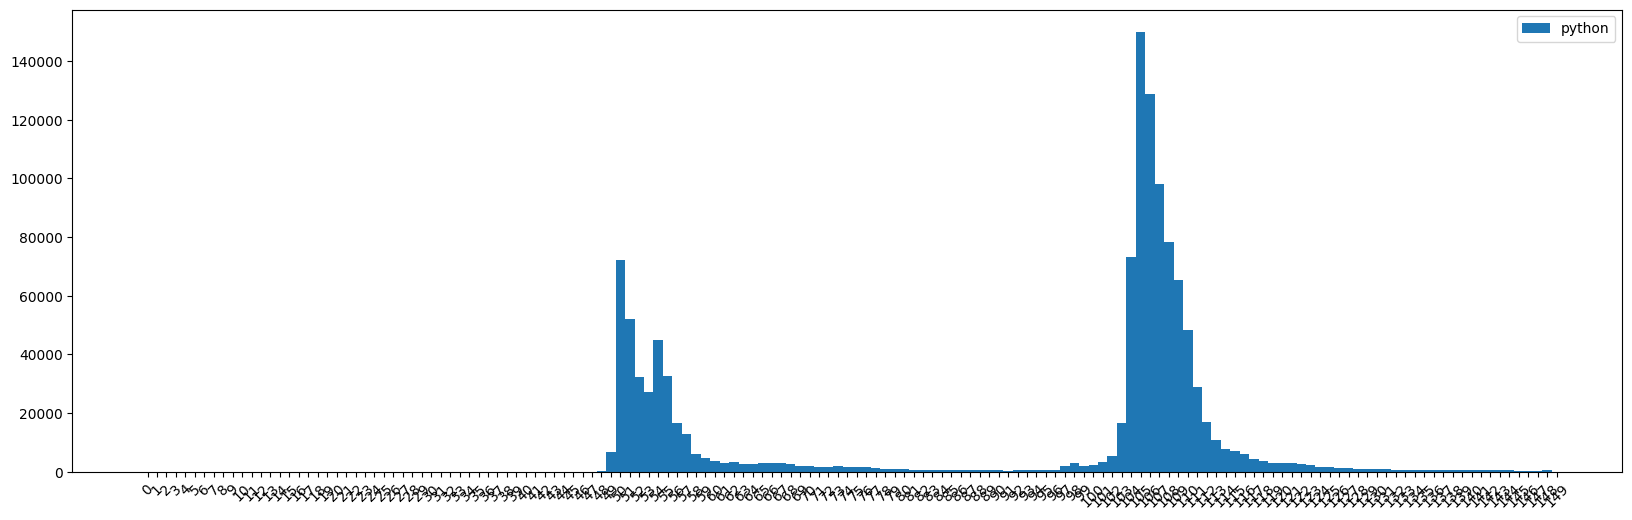

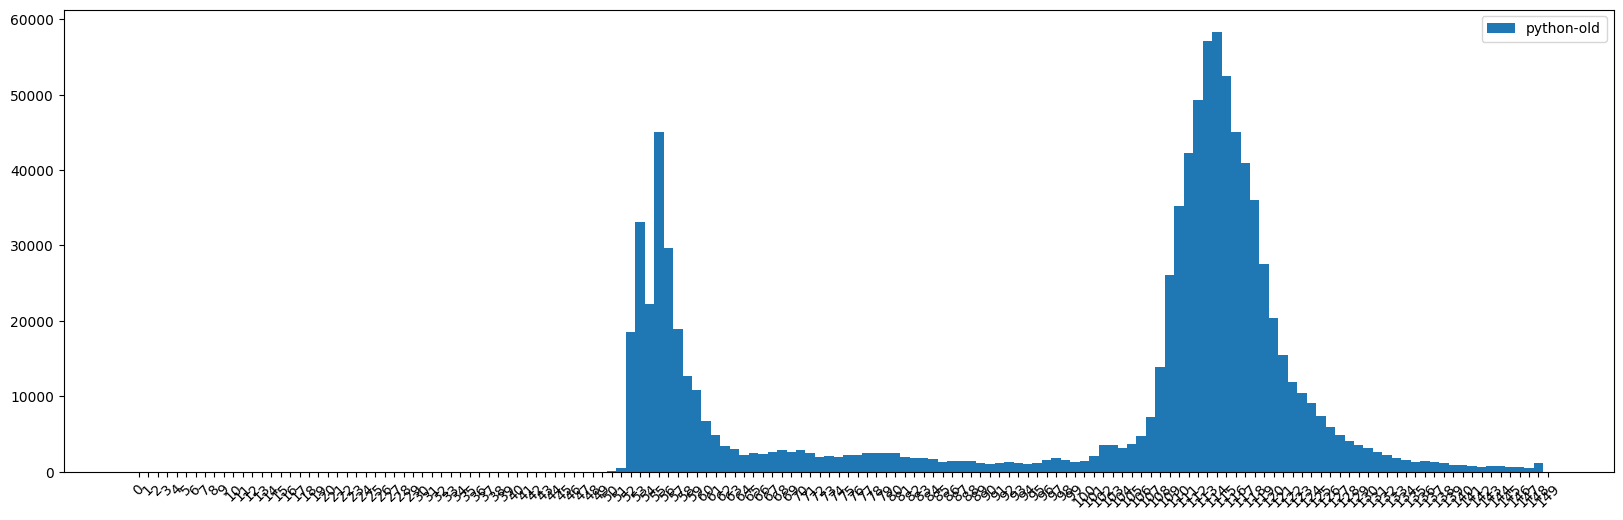

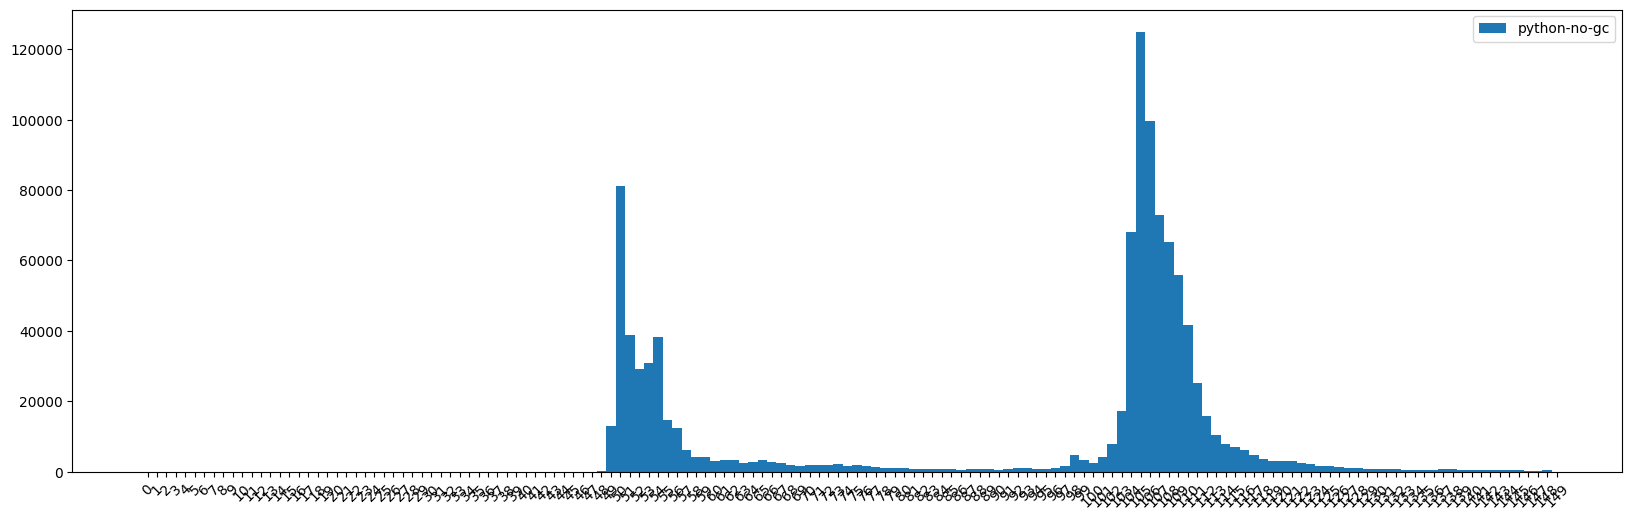

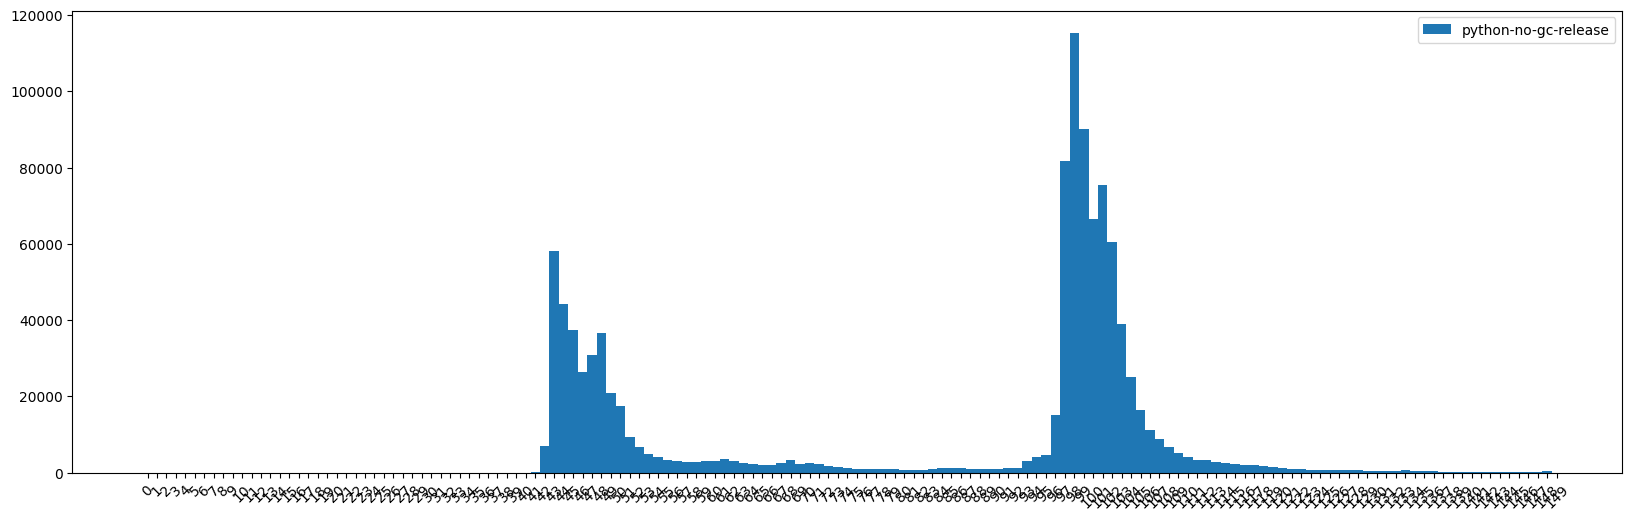

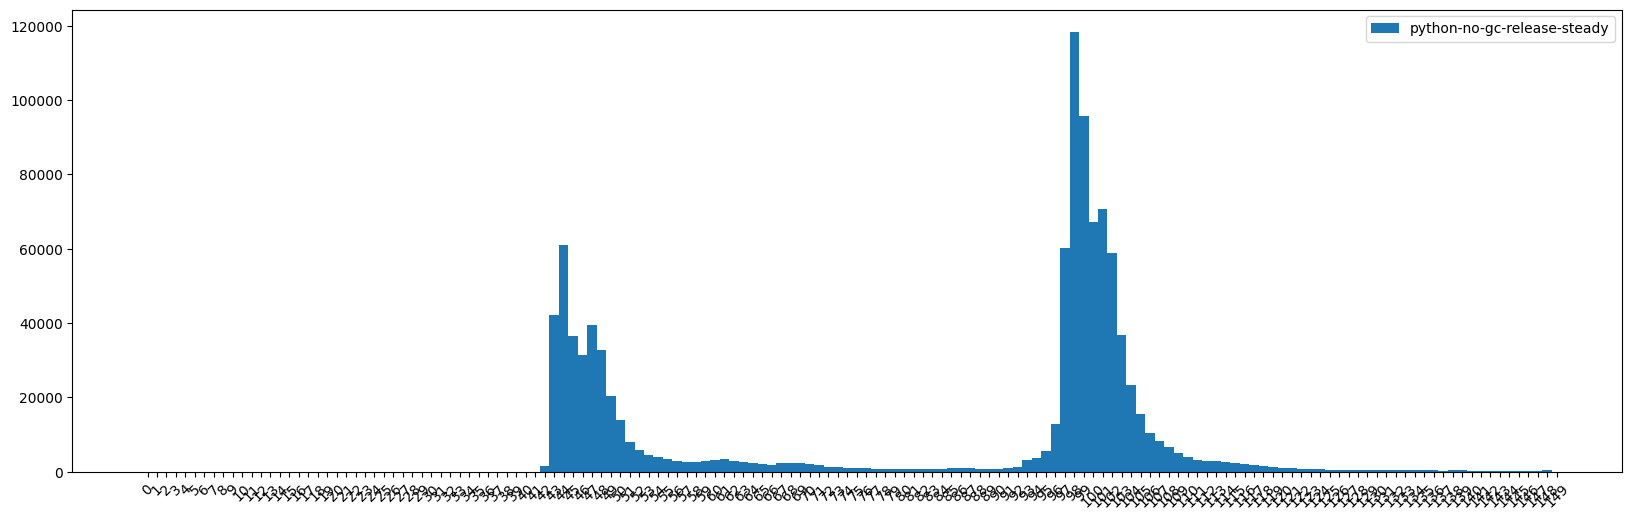

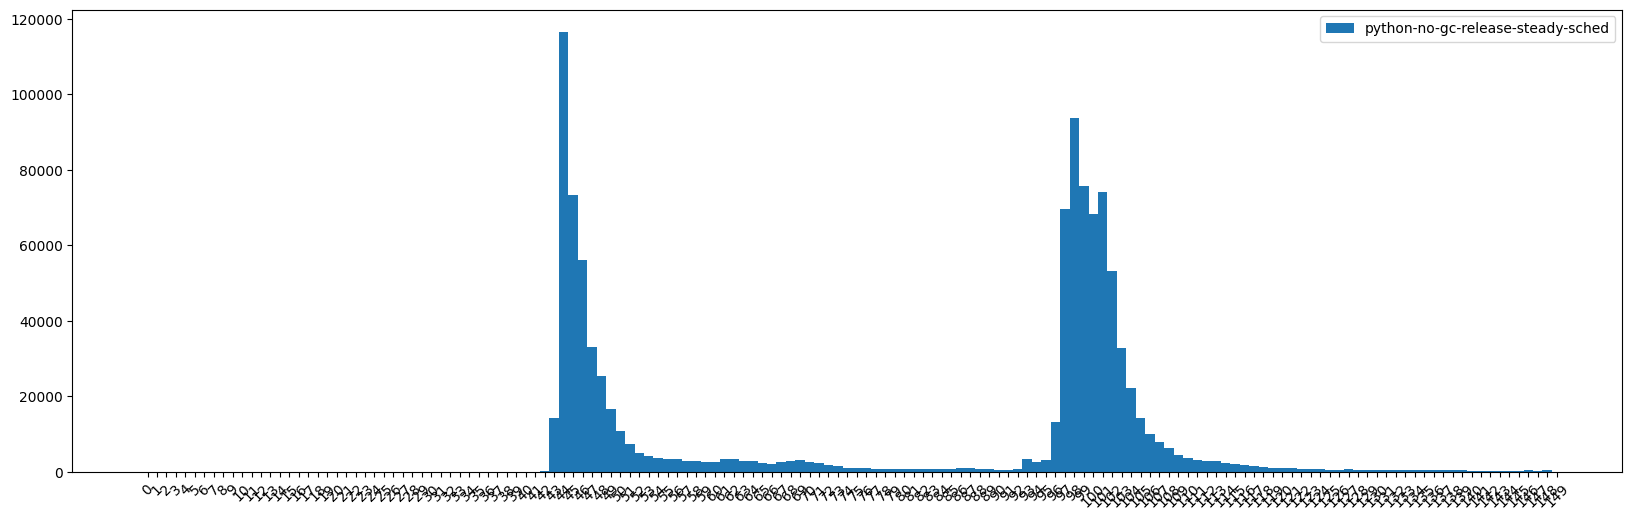

In [9]:
bin_width = 1
# number_of_bins = 50

for key, data in datas.items():
    bin_max = 100
    bin_min = 0
    if "python" in key:
        bin_max = 150
        bin_mix = 20

    bins = [x * bin_width for x in range(bin_min, int(bin_max / bin_width))]
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(6)

    plt.hist(data, label=key, alpha=1, bins=bins, log=False, align='left')
    plt.legend(loc='upper right')
    plt.xticks(bins, rotation=45)


In [10]:
df = pd.DataFrame(columns=datas.keys(), index=["mean", "median", "std", "max", "min", "over_200", "over_200_%"])

for key, data in datas.items():
    df[key]["mean"] = np.mean(data)
    df[key]["median"] = np.median(data)
    df[key]["std"] = np.std(data)
    df[key]["max"] = np.max(data)
    df[key]["min"] = np.min(data)

    over_200 = np.extract(data > 200, data)

    df[key]["over_200"] = len(over_200)
    df[key]["over_200_%"] = len(over_200) / len(data) * 100


df

,cppmatlab,cppmatlab-release-steady-sched,cppmatlab-release,xeon,matlab,python,python-old,python-no-gc,python-no-gc-release,python-no-gc-release-steady,python-no-gc-release-steady-sched
mean,13.329031,13.134905,3.954062,26.148138,4224.888378,92.490066,108.609255,92.27327,84.06923,83.73355,80.594188
median,15.0,12.0,3.0,29.0,4034.0,105.0,112.0,105.0,98.0,98.0,97.0
std,5.628257,4.917315,2.557177,7.481867,569.335829,27.038732,1766.285125,27.909021,27.57237,27.769005,29.177245
max,567.0,90.0,68.0,96.0,88105.0,405.0,1034824.0,576.0,599.0,1186.0,426.0
min,7.0,8.0,2.0,7.0,3282.0,47.0,50.0,47.0,41.0,41.0,42.0
over_200,1,0,0,0,1008767,4456,13436,4850,1822,1894,2024
over_200_%,0.000098,0.0,0.0,0.0,100.0,0.383499,1.435185,0.473801,0.173591,0.187285,0.196315


In [ ]:
bin_width = 1
# number_of_bins = 50

for key, data in datas.items():
    bin_max = 50
    bin_min = 0
    if "python" in key:
        bin_max = 150
        bin_mix = 20

    bins = [x * bin_width for x in range(bin_min, int(bin_max / bin_width))]
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(6)

    plt.hist(data, label=key, alpha=1, bins=bins, log=False, align='left')
    plt.legend(loc='upper right')
    plt.xticks(bins, rotation=45)


In [ ]:
df = pd.DataFrame(columns=datas.keys(), index=["mean", "median", "std", "max", "min", "over_200", "over_200_%"])

for key, data in datas.items():
    df[key]["mean"] = np.mean(data)
    df[key]["median"] = np.median(data)
    df[key]["std"] = np.std(data)
    df[key]["max"] = np.max(data)
    df[key]["min"] = np.min(data)

    over_200 = np.extract(data > 200, data)

    df[key]["over_200"] = len(over_200)
    df[key]["over_200_%"] = len(over_200) / len(data) * 100


df

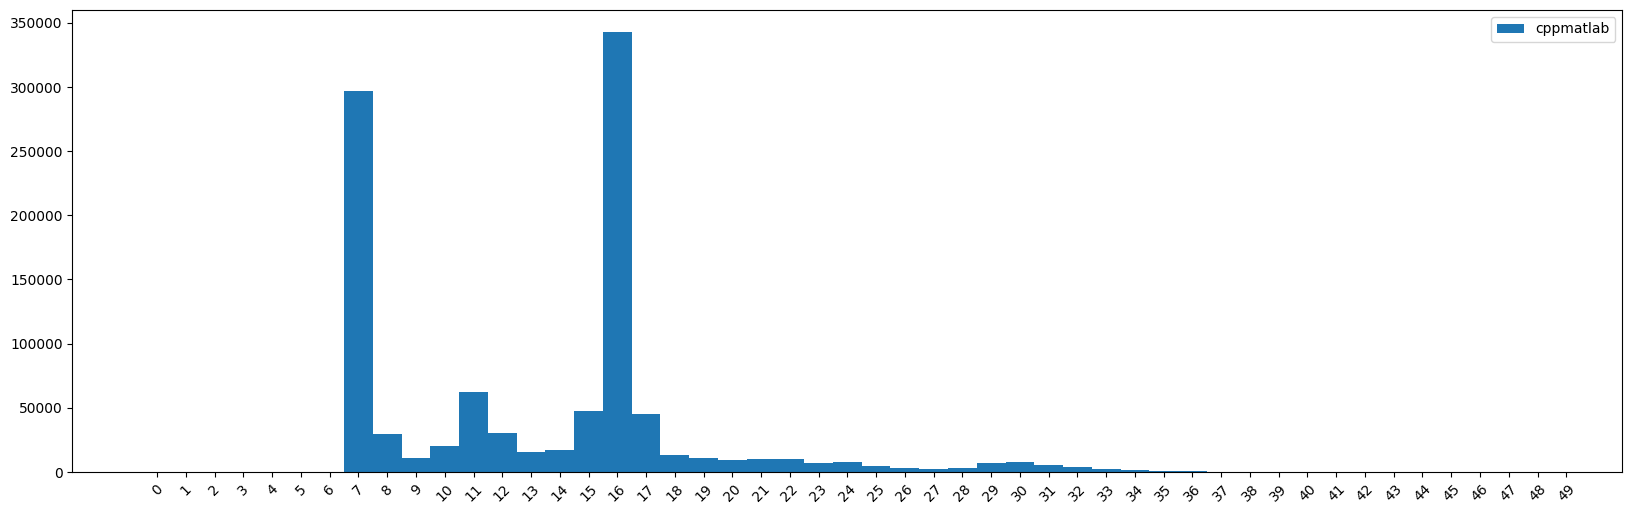

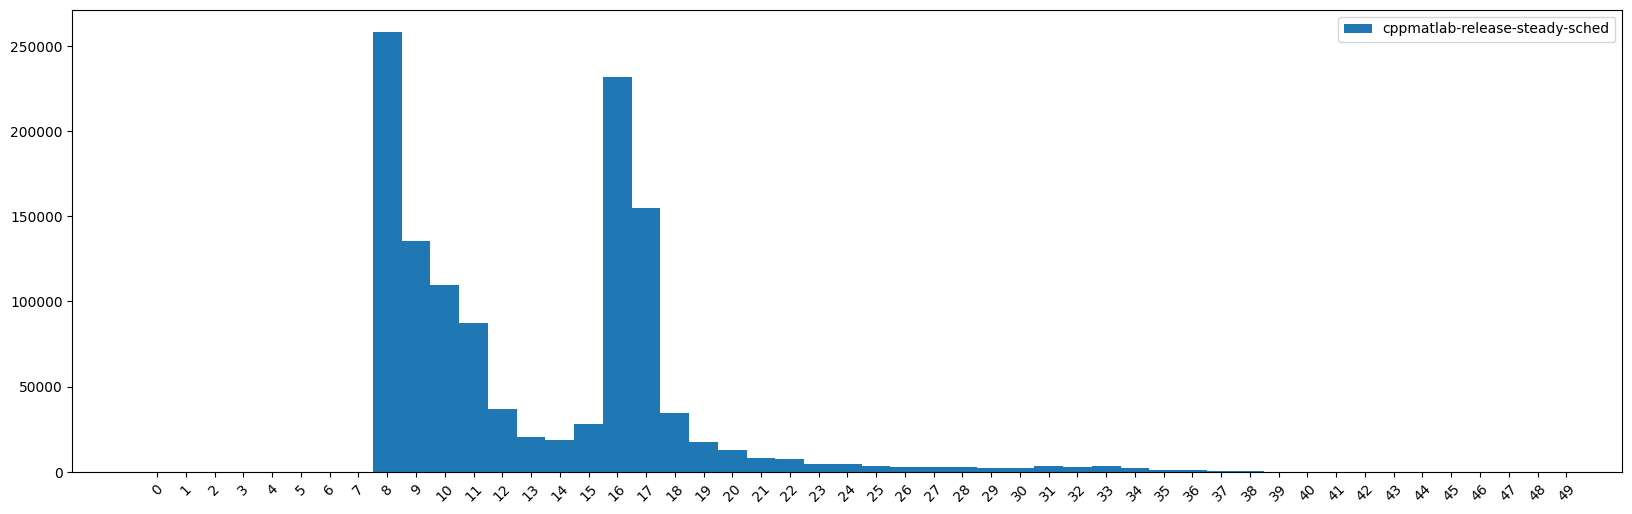

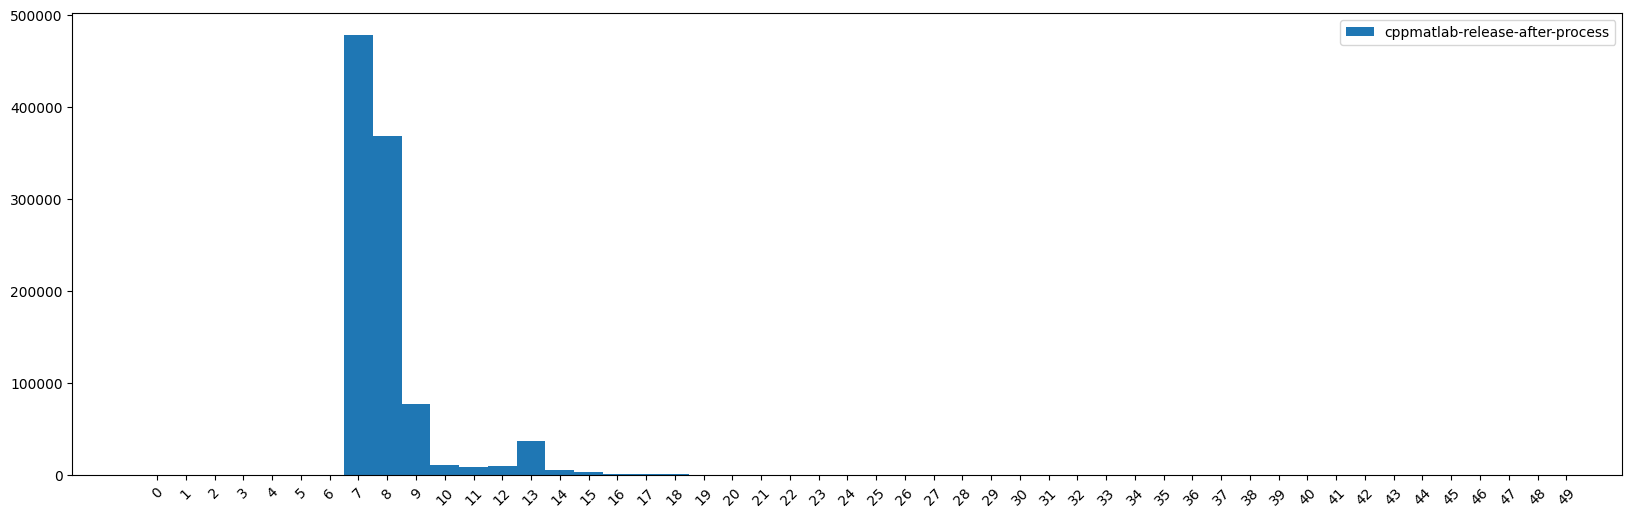

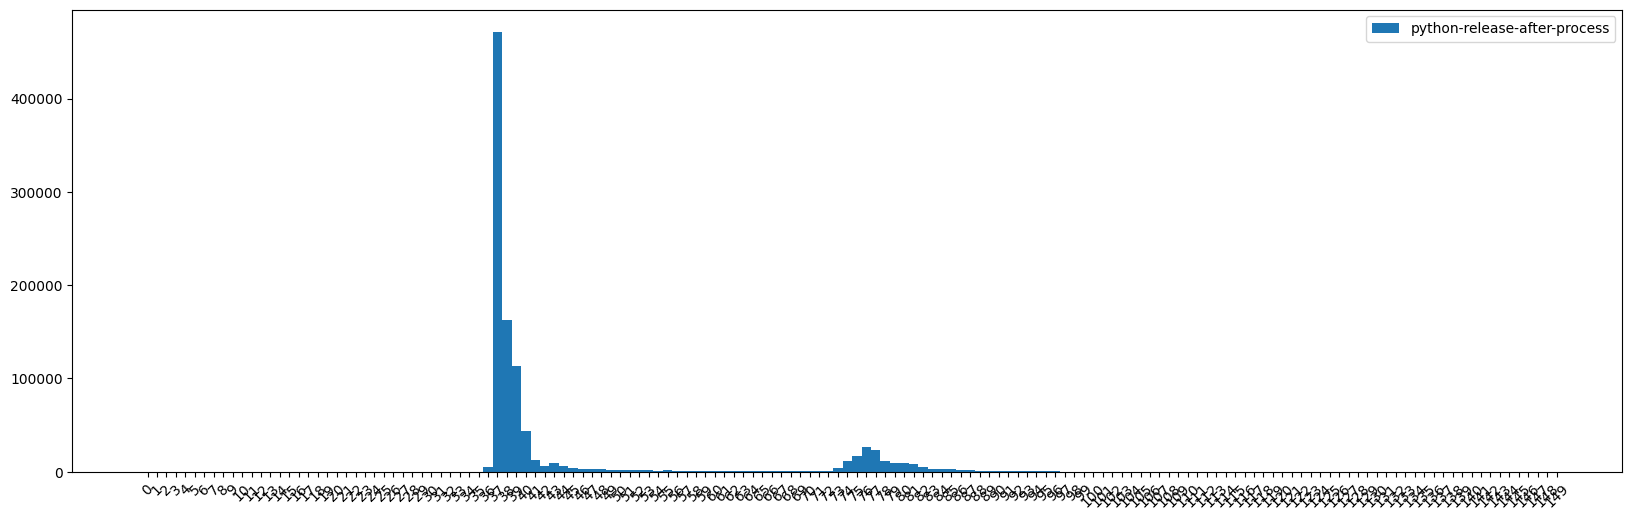

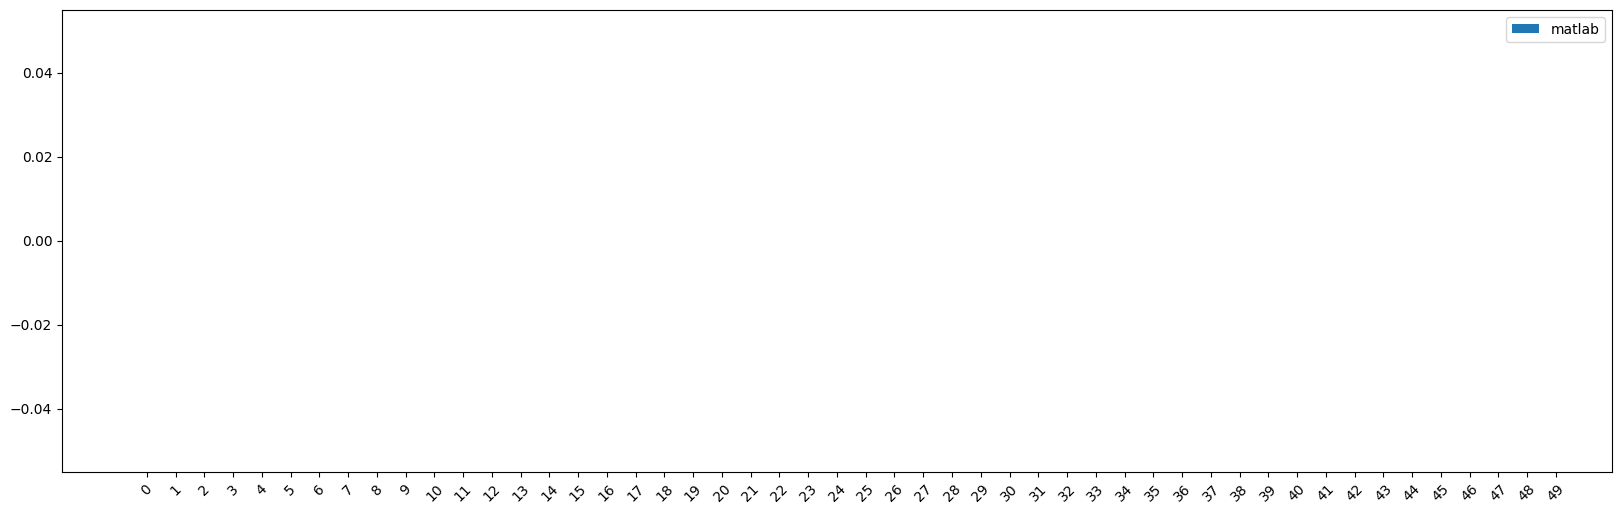

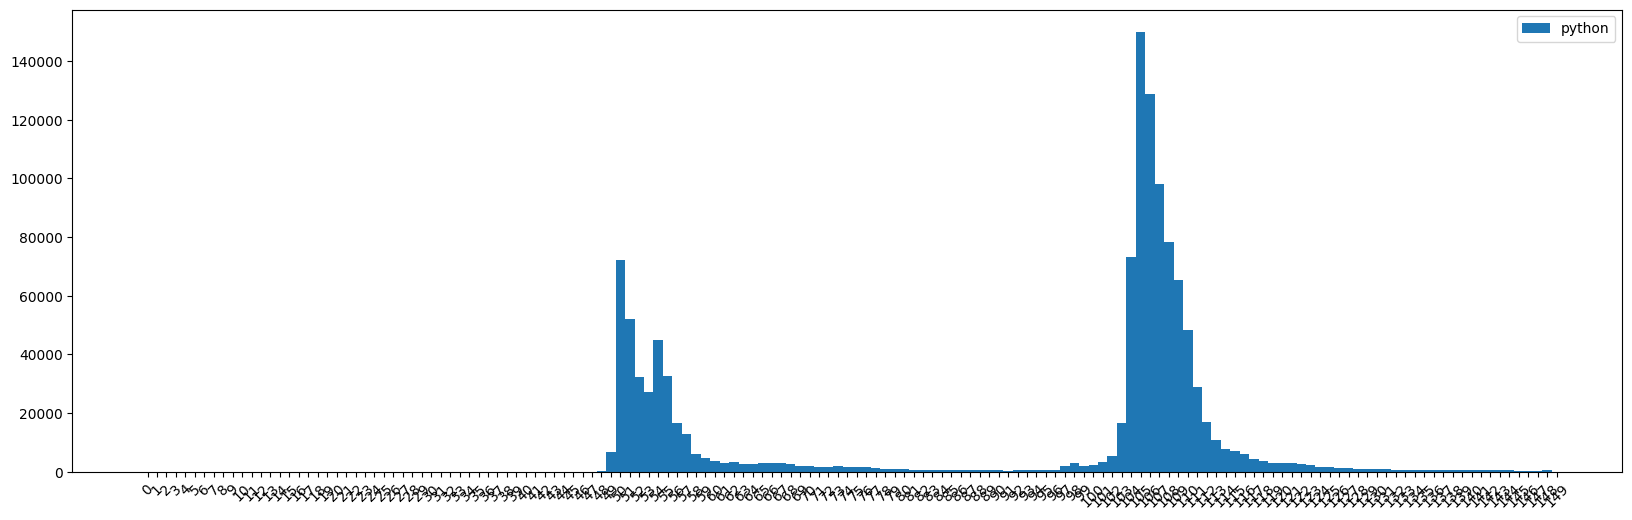

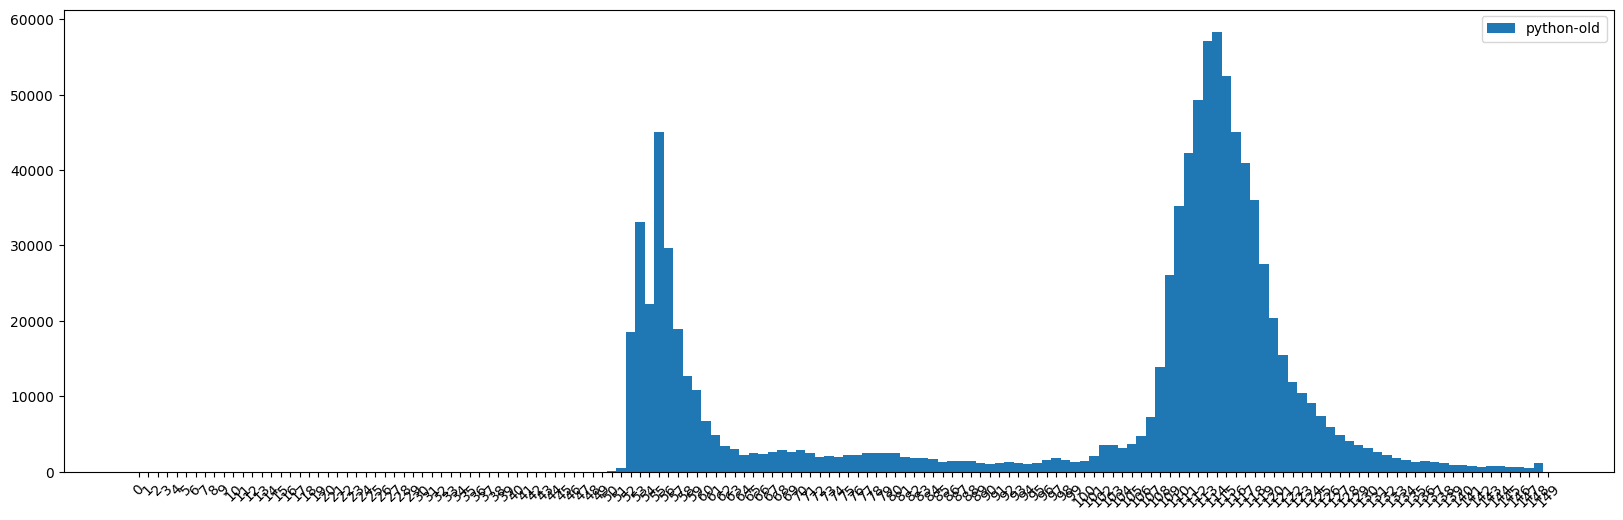

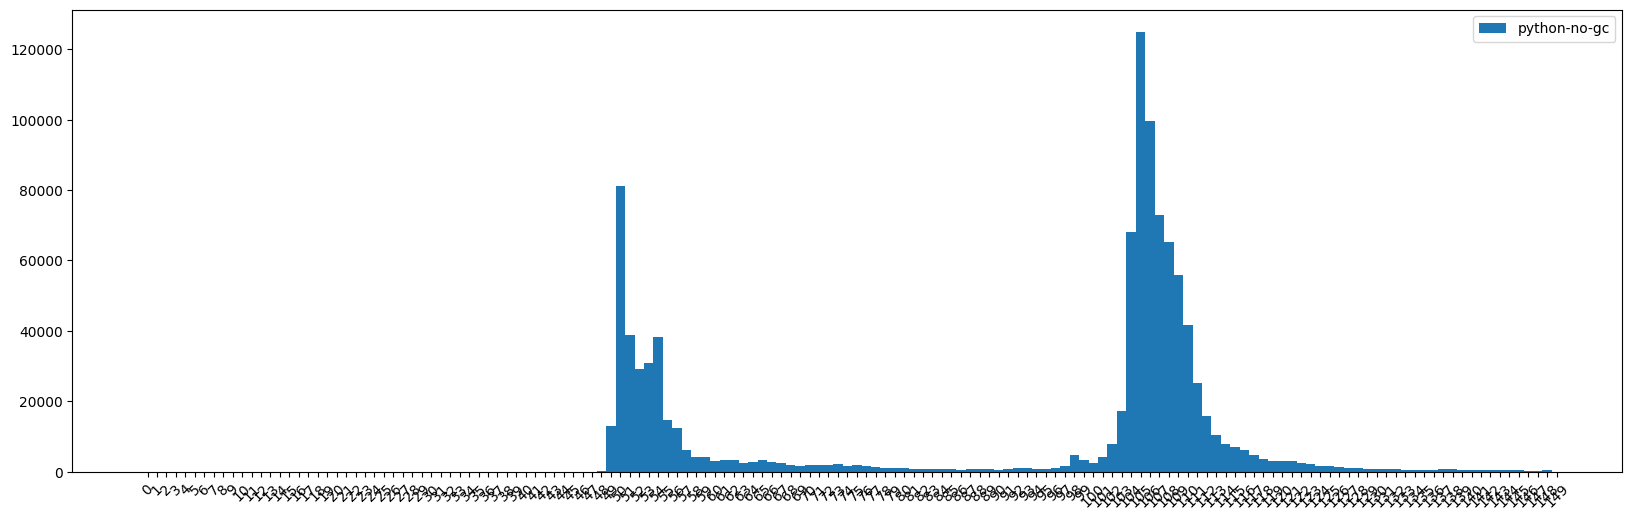

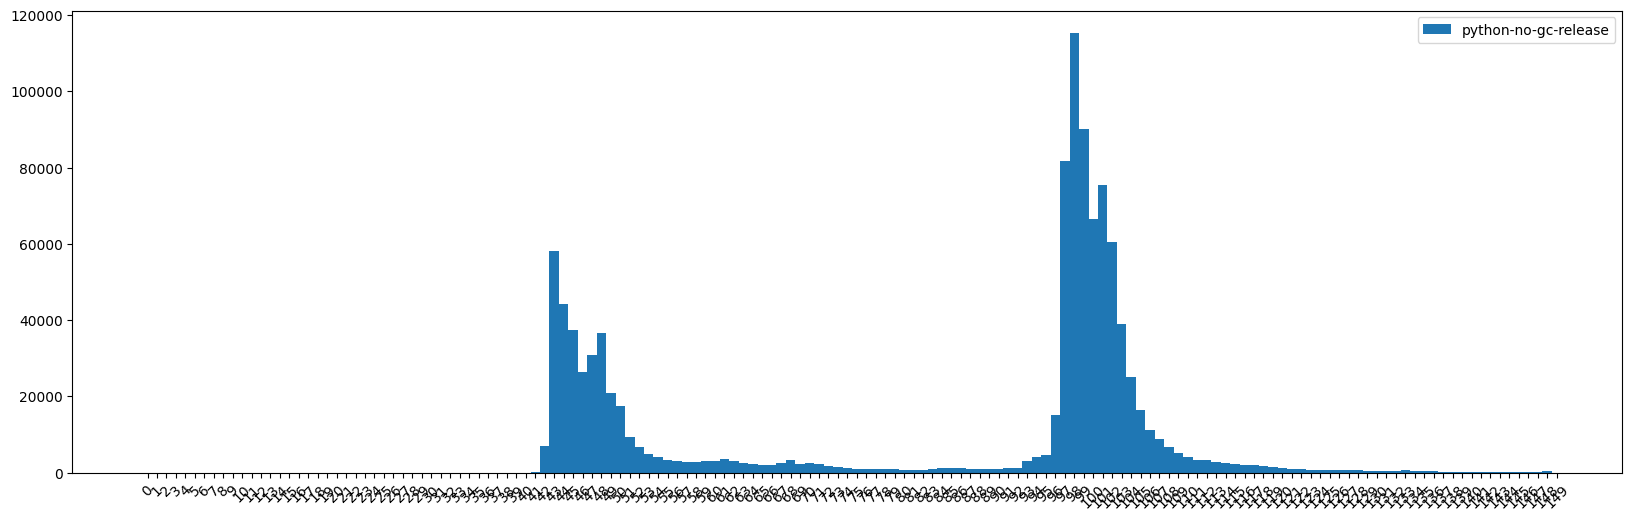

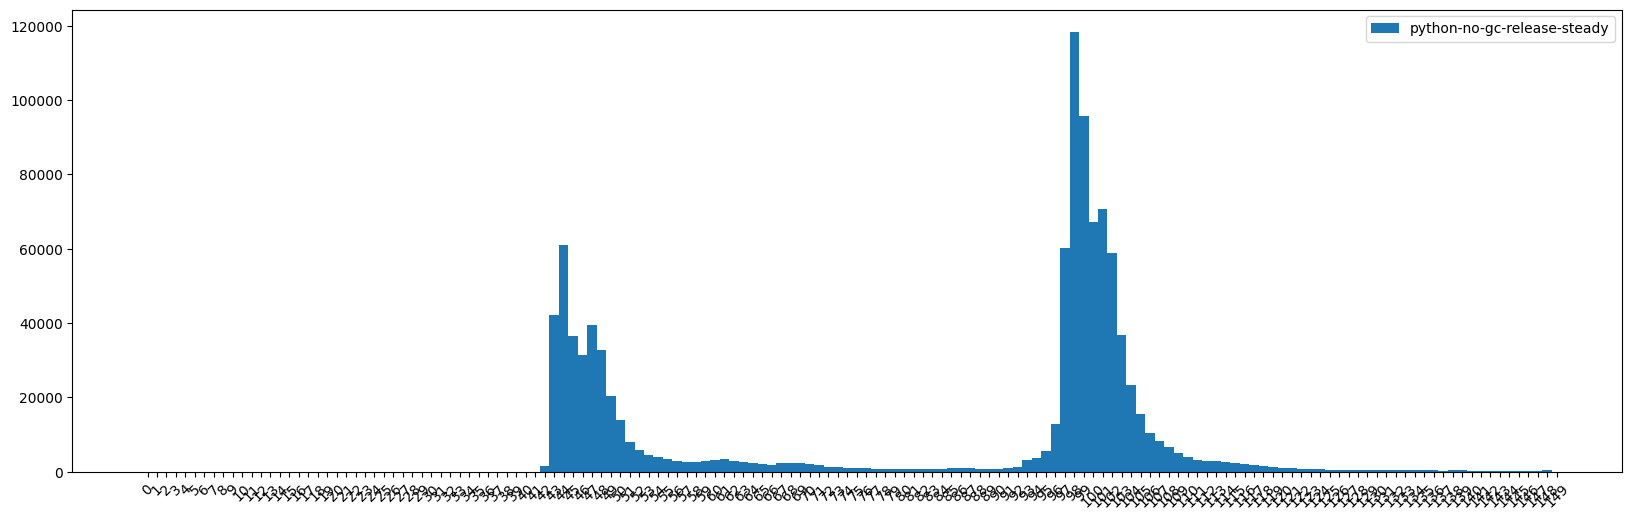

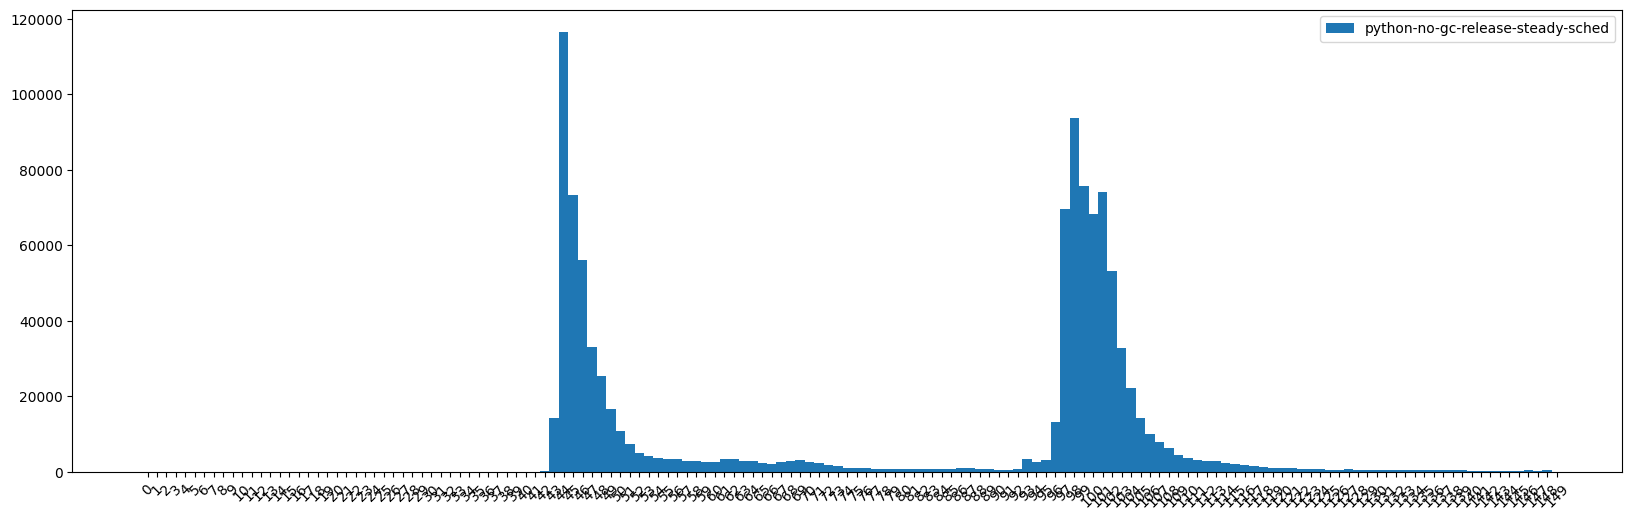

In [48]:
bin_width = 1
# number_of_bins = 50

for key, data in datas.items():
    bin_max = 50
    bin_min = 0
    if "python" in key:
        bin_max = 150
        bin_mix = 20

    bins = [x * bin_width for x in range(bin_min, int(bin_max / bin_width))]
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(6)

    plt.hist(data, label=key, alpha=1, bins=bins, log=False, align='left')
    plt.legend(loc='upper right')
    plt.xticks(bins, rotation=45)


In [35]:
df = pd.DataFrame(columns=datas.keys(), index=["mean", "median", "std", "max", "min", "over_200", "over_200_%"])

for key, data in datas.items():
    df[key]["mean"] = np.mean(data)
    df[key]["median"] = np.median(data)
    df[key]["std"] = np.std(data)
    df[key]["max"] = np.max(data)
    df[key]["min"] = np.min(data)

    over_200 = np.extract(data > 200, data)

    df[key]["over_200"] = len(over_200)
    df[key]["over_200_%"] = len(over_200) / len(data) * 100


df

,cppmatlab,cppmatlab-release-steady-sched,python-release-after-process,matlab,python,python-old,python-no-gc,python-no-gc-release,python-no-gc-release-steady,python-no-gc-release-steady-sched
mean,13.329031,13.134905,45.727966,4224.888378,92.490066,108.609255,92.27327,84.06923,83.73355,80.594188
median,15.0,12.0,38.0,4034.0,105.0,112.0,105.0,98.0,98.0,97.0
std,5.628257,4.917315,296.251914,569.335829,27.038732,1766.285125,27.909021,27.57237,27.769005,29.177245
max,567.0,90.0,53633.0,88105.0,405.0,1034824.0,576.0,599.0,1186.0,426.0
min,7.0,8.0,36.0,3282.0,47.0,50.0,47.0,41.0,41.0,42.0
over_200,1,0,162,1008767,4456,13436,4850,1822,1894,2024
over_200_%,0.000098,0.0,0.0162,100.0,0.383499,1.435185,0.473801,0.173591,0.187285,0.196315


['cppmatlab', 'matlab', 'python']